<a href="https://colab.research.google.com/github/Mayuriluniya/Car_Damaged_Detection_Using_YOLOV5_VGG/blob/main/Text_from_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt install tesseract-ocr


Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14071 sha256=98b319cd254d6228e5cddedac3711617da447e24fcabfda78f64f662d782ff6d
  Stored in directory: /root/.cache/pip/wheels/a2/66/45/88bf1b2d428817a006944b9730b27d6861b776e05a9e262bd4
Successfully built pytesseract


In [ ]:
try:
 from PIL import Image
except ImportError:
 import Image
import cv2
import pytesseract 

In [ ]:
pytesseract.pytesseract.tesseract_cmd = ( r'/usr/bin/tesseract')

In [ ]:
!pip3 install torch==1.9.0+cu102 torchvision==0.10.0+cu102 torchaudio===0.9.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 1.9MB 5.1MB/s 


In [ ]:
!pip install easyocr
!pip install imutils

     |████████████████████████████████| 63.2MB 47kB/s 


In [ ]:
from PIL import Image
import pytesseract 
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils

import easyocr

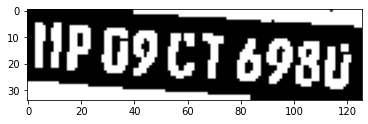

In [ ]:
img = cv2.imread('img2.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
#plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
#plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
threshold_img = cv2.threshold(cropped_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
#kernel2 = np.ones((3,3),np.uint8)
#eroded = cv2.erode(threshold_img.copy(), kernel2, iterations=1)
#plt.imshow(cv2.cvtColor(eroded, cv2.COLOR_BGR2RGB))
#kernel = np.ones((3,3),np.uint8)
#dilated = cv2.dilate(eroded.copy(), kernel, iterations=1)
#plt.imshow(cv2.cvtColor(dilated, cv2.COLOR_BGR2RGB))
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(threshold_img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(threshold_img, cv2.MORPH_CLOSE, kernel)
plt.imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))

In [ ]:
text = pytesseract.image_to_string(threshold_img, lang = 'eng')
print(text)

Tee



In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 0], [126, 0], [126, 34], [0, 34]], 'HPO9CT 6980', 0.30003904211928756)]

In [ ]:
import io
import json
import requests

In [ ]:
#img = cv2.imread('no_plate.png')
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
url_api = "https://api.ocr.space/parse/image"
_, compressedimage = cv2.imencode(".jpg", threshold_img)

#plt.imshow(cv2.cvtColor(compressedimage, cv2.COLOR_BGR2RGB))
file_bytes = io.BytesIO(compressedimage)
result = requests.post(url_api,
              files = {"noplate6.jpg": file_bytes},
              data = {"apikey": "4f6204cf8288957",
                      "language": "eng"})

result = result.content.decode()
result = json.loads(result)

parsed_results = result.get("ParsedResults")[0]
text_detected = parsed_results.get("ParsedText")
print(text_detected)


MP09CT698CI



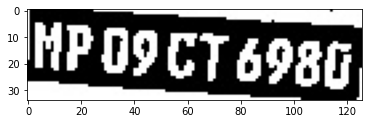

In [ ]:
new_im = cv2.imdecode(compressedimage, 1)
plt.imshow(cv2.cvtColor(new_im, cv2.COLOR_BGR2RGB))